In [2]:
# analyze_training.py
import numpy as np
import matplotlib.pyplot as plt
import struct
import yfinance as yf
import prepare_data

In [52]:
tickers = prepare_data.get_tickers(n_total=140)
print(f"Selected {len(tickers)} tickers\n")
    
    # 2. Download closing prices (15 years)
print("Downloading 15 years of closing prices...")
data = yf.download(tickers, period="15y", progress=True)
prices = data['Close']  

Fetching 140 tickers from various sectors...


[                       0%                       ]

Selected 140 tickers



[*********************100%***********************]  140 of 140 completed


In [53]:
prices

Ticker,AAPL,ABBV,ABT,AEP,AMAT,AMGN,APD,APP,AU,AVB,...,VZ,WBD,WEC,WELL,WFC,WM,WMB,WMT,XEL,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-23,9.705101,NaN,16.711359,20.361259,11.038859,38.623795,57.695183,NaN,39.686531,68.075699,...,16.617868,21.538069,18.018536,25.100698,20.590397,25.286753,9.293489,13.104538,14.291441,41.184647
2010-12-27,9.737491,NaN,16.561054,20.338587,11.101937,38.439903,57.752384,NaN,39.703056,69.269157,...,16.646006,21.394993,18.024637,25.175097,20.736567,25.376850,9.297267,13.097202,14.285353,41.077759
2010-12-28,9.761186,NaN,16.564550,20.434956,11.117705,38.112991,57.962048,NaN,40.951267,70.058563,...,16.702271,21.359222,18.119173,25.265417,20.729921,25.404549,9.293489,13.138768,14.321889,41.308449
2010-12-29,9.755786,NaN,16.575033,20.474636,11.133475,38.051685,57.981110,NaN,40.802471,70.008949,...,16.683516,21.563618,18.058182,25.254791,20.610331,25.501574,9.342563,13.221892,14.309705,41.280300
2010-12-30,9.706903,NaN,16.627464,20.434956,11.141362,37.820122,58.102497,NaN,40.314766,70.083374,...,16.674139,21.359222,18.000240,25.313238,20.477444,25.515438,9.308589,13.219446,14.340154,41.274673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-17,271.839996,224.309998,126.709999,114.709999,248.270004,326.010010,246.380005,657.130005,84.540001,181.259995,...,40.880001,28.209999,104.760002,189.160004,92.589996,219.770004,58.840000,115.660004,73.139999,117.410004
2025-12-18,272.190002,222.820007,125.120003,115.580002,253.500000,324.420013,243.750000,694.369995,85.680000,181.229996,...,40.410000,27.610001,105.250000,187.490005,91.480003,218.320007,58.660000,114.830002,73.610001,116.540001
2025-12-19,273.670013,226.820007,125.449997,114.489998,256.410004,327.380005,239.960007,721.369995,86.199997,179.130005,...,39.820000,27.770000,103.940002,186.009995,93.010002,216.339996,58.259998,114.360001,72.669998,116.690002


=== ANALYSE DES PARAMÈTRES ===

Distribution initiale π :
[1. 0. 0.]

Matrice de transition A :
[[0.8564611  0.02682464 0.11695591]
 [0.22478512 0.6221485  0.15337548]
 [0.3048968  0.05587242 0.639666  ]]

Moyennes μ (premiers 5 assets) :
[[ 0.0014191   0.00073996  0.00059462  0.00100741  0.00065888]
 [ 0.00211987  0.00098471 -0.0014762   0.00439273 -0.00020939]
 [-0.00083735 -0.00019265  0.00074658 -0.00037749  0.00067031]]

Persistance des états (diagonale de A) :
  État 0: 0.8565
  État 1: 0.6221
  État 2: 0.6397


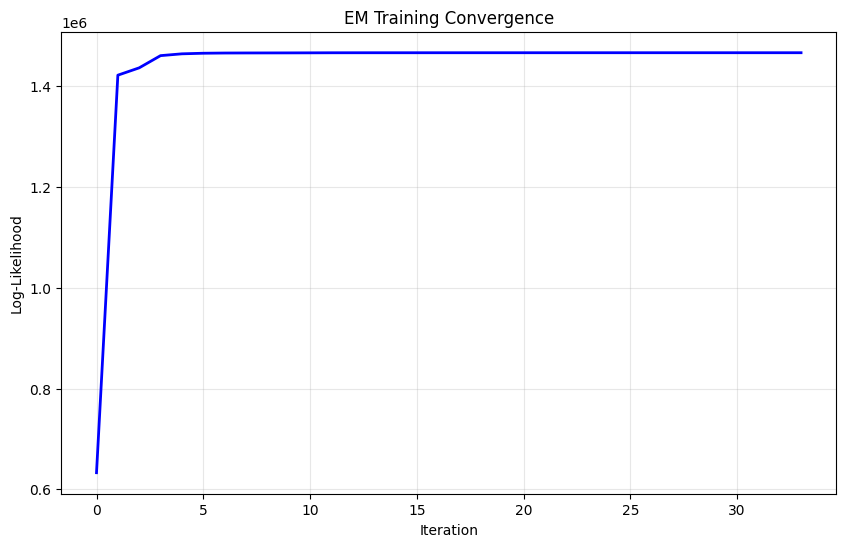

In [3]:


def load_parameters(filename):
    """Charge les paramètres depuis le fichier binaire"""
    with open(filename, 'rb') as f:
        N = struct.unpack('i', f.read(4))[0]
        K = struct.unpack('i', f.read(4))[0]
        
        A = np.frombuffer(f.read(N * N * 4), dtype=np.float32).reshape(N, N)
        pi = np.frombuffer(f.read(N * 4), dtype=np.float32)
        mu = np.frombuffer(f.read(N * K * 4), dtype=np.float32).reshape(N, K)
        Sigma = np.frombuffer(f.read(N * K * K * 4), dtype=np.float32).reshape(N, K, K)
        
    return {'N': N, 'K': K, 'A': A, 'pi': pi, 'mu': mu, 'Sigma': Sigma}

def plot_training_history(csv_file):
    """Plot la courbe de convergence"""
    data = np.loadtxt(csv_file, delimiter=',', skiprows=1)
    iterations = data[:, 0]
    log_likelihood = data[:, 1]
    
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, log_likelihood, 'b-', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Log-Likelihood')
    plt.title('EM Training Convergence')
    plt.grid(True, alpha=0.3)
    plt.savefig('training_convergence.png', dpi=150)
    plt.show()

def analyze_parameters(params):
    """Analyse les paramètres appris"""
    print("=== ANALYSE DES PARAMÈTRES ===\n")
    
    print("Distribution initiale π :")
    print(params['pi'])
    print()
    
    print("Matrice de transition A :")
    print(params['A'])
    print()
    
    print("Moyennes μ (premiers 5 assets) :")
    print(params['mu'][:, :5])
    print()

 
    
    # Persistance des états
    persistence = np.diag(params['A'])
    print("Persistance des états (diagonale de A) :")
    for i, p in enumerate(persistence):
        print(f"  État {i}: {p:.4f}")

if __name__ == '__main__':
    params = load_parameters('trained_params.bin')
    analyze_parameters(params)
    plot_training_history('training_history.csv')

Matrice de transition A:
[[0.8564611  0.02682464 0.11695591]
 [0.22478512 0.6221485  0.15337548]
 [0.3048968  0.05587242 0.639666  ]]


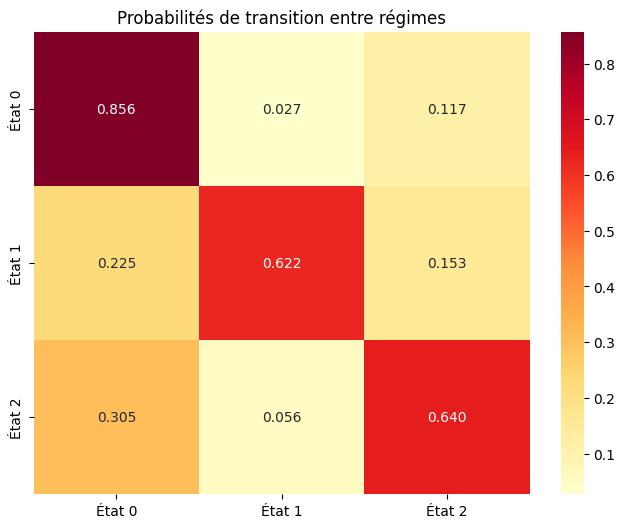

In [4]:
# Matrice de transition
A = params['A']
print("Matrice de transition A:")
print(A)

# Visualiser
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(A, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=[f'État {i}' for i in range(3)],
            yticklabels=[f'État {i}' for i in range(3)])
plt.title('Probabilités de transition entre régimes')
plt.savefig('transition_matrix.png', dpi=150)
plt.show()

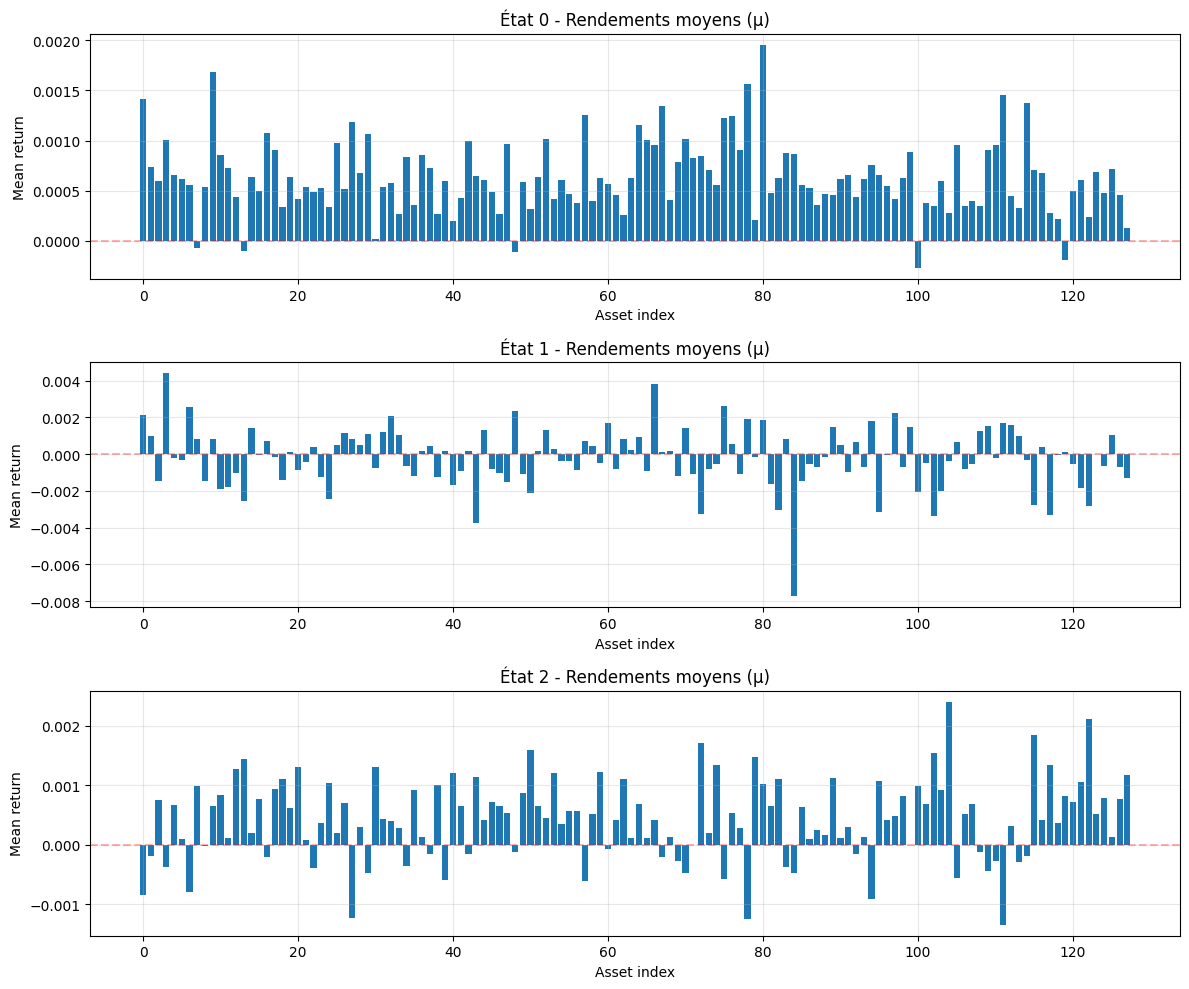

État 0:
  Rendement moyen: 0.0006
  Volatilité moyenne: 0.0149
  Persistance: 0.8565

État 1:
  Rendement moyen: -0.0002
  Volatilité moyenne: 0.0327
  Persistance: 0.6221

État 2:
  Rendement moyen: 0.0004
  Volatilité moyenne: 0.0209
  Persistance: 0.6397



In [5]:
import numpy as np
import matplotlib.pyplot as plt



# Plot des moyennes par état
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for state in range(3):
    axes[state].bar(range(len(params['mu'][state])), params['mu'][state])
    axes[state].set_title(f'État {state} - Rendements moyens (μ)')
    axes[state].set_xlabel('Asset index')
    axes[state].set_ylabel('Mean return')
    axes[state].axhline(y=0, color='r', linestyle='--', alpha=0.3)
    axes[state].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('states_interpretation.png')
plt.show()

# Statistiques par état
for state in range(3):
    mean_return = np.mean(params['mu'][state])
    volatility = np.sqrt(np.mean(np.diag(params['Sigma'][state])))
    print(f"État {state}:")
    print(f"  Rendement moyen: {mean_return:.4f}")
    print(f"  Volatilité moyenne: {volatility:.4f}")
    print(f"  Persistance: {params['A'][state, state]:.4f}")
    print()

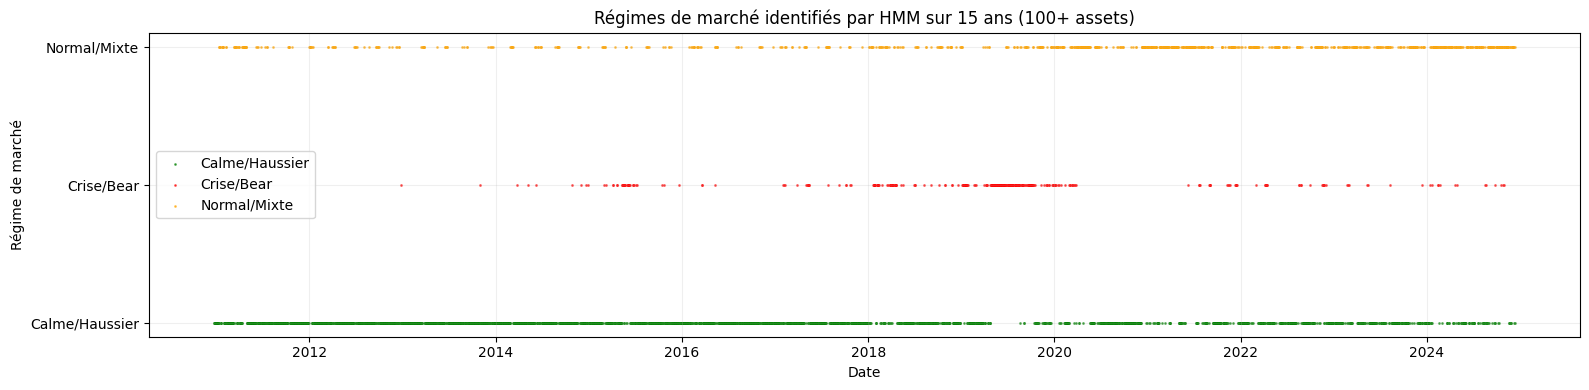

Période de crise la plus longue (COVID?):
  Du 2019-04-25 au 2019-06-25
  Durée: 44 jours

Nombre de changements de régime par année:
year
2010     1
2011    35
2012    38
2013    31
2014    37
2015    48
2016    35
2017    50
2018    79
2019    72
2020    63
2021    66
2022    69
2023    97
2024    84
dtype: int64


/tmp/ipykernel_131964/1771465046.py:46: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transitions_per_year = states.groupby('year').apply(


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les états
states = pd.read_csv('decoded_states.csv')

# Reconstituer les dates (15 ans de données boursières)
# Environ 252 jours ouvrés par an × 15 = 3780 jours
# Mais tu as 3647 jours → commence probablement vers début 2010
start_date = pd.Timestamp('2010-12-23')  
dates = pd.bdate_range(start=start_date, periods=len(states))
states['date'] = dates

# Définir les couleurs et labels
colors = {0: 'green', 1: 'red', 2: 'orange'}
labels = {0: 'Calme/Haussier', 1: 'Crise/Bear', 2: 'Normal/Mixte'}

# Timeline
fig, ax = plt.subplots(figsize=(16, 4))
for state in range(3):
    mask = states['state'] == state
    ax.scatter(states[mask]['date'], [state]*mask.sum(), 
              c=colors[state], label=labels[state], alpha=0.6, s=1)

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(labels.values())
ax.set_xlabel('Date')
ax.set_ylabel('Régime de marché')
ax.set_title('Régimes de marché identifiés par HMM sur 15 ans (100+ assets)')
ax.legend()
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('regime_timeline_dated.png', dpi=200)
plt.show()

# Identifier COVID
covid_start = 2175
covid_end = 2218
print(f"Période de crise la plus longue (COVID?):")
print(f"  Du {states.iloc[covid_start]['date'].date()} au {states.iloc[covid_end]['date'].date()}")
print(f"  Durée: {covid_end - covid_start + 1} jours")

# Compter les transitions par an
states['year'] = states['date'].dt.year
transitions_per_year = states.groupby('year').apply(
    lambda x: (x['state'].diff() != 0).sum()
)
print("\nNombre de changements de régime par année:")
print(transitions_per_year)